# Neural Nets and Deep Learning Project

In [0]:
import h5py
import numpy as np

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [0]:
h5f = h5py.File('/content/drive/My Drive/ABK_AIML/ComputerVision/SVHN_single_grey1.h5', 'r')

In [0]:
x_train = h5f['X_train'][:]
y_train_num = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test_num = h5f['y_test'][:]

In [0]:
h5f.close()

In [0]:
x_train.shape

(42000, 32, 32)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

In [0]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

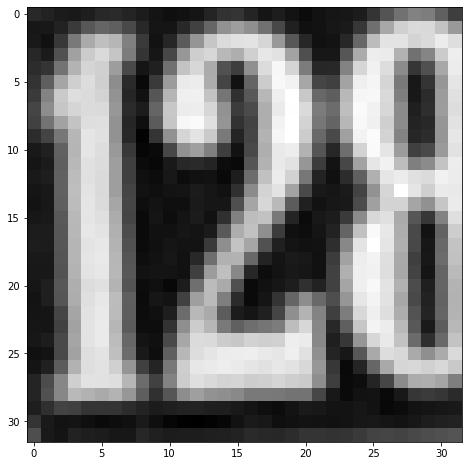

In [0]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

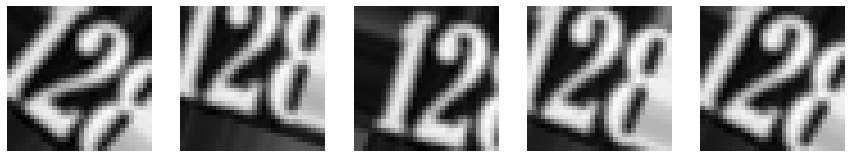

In [0]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [0]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))

    model3.add(Dense(128))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))

    model3.add(Dense(128))
    model3.add(BatchNormalization())
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(BatchNormalization())
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':


In [0]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1312, epochs=10)`
  after removing the cwd from sys.path.




Epoch 1/10
1312/1312 [==============================] - 183s 139ms/step - loss: 2.1308 - acc: 0.2239 - val_loss: 1.5904 - val_acc: 0.4522
Epoch 2/10
1312/1312 [==============================] - 180s 137ms/step - loss: 1.5295 - acc: 0.4814 - val_loss: 1.2528 - val_acc: 0.5865
Epoch 3/10
1312/1312 [==============================] - 180s 138ms/step - loss: 1.2840 - acc: 0.5758 - val_loss: 0.9148 - val_acc: 0.7229
Epoch 4/10
1312/1312 [==============================] - 181s 138ms/step - loss: 1.1417 - acc: 0.6254 - val_loss: 0.9400 - val_acc: 0.7017
Epoch 5/10
1312/1312 [==============================] - 182s 139ms/step - loss: 1.0745 - acc: 0.6500 - val_loss: 0.9569 - val_acc: 0.6864
Epoch 6/10
1312/1312 [==============================] - 181s 138ms/step - loss: 1.0046 - acc: 0.6747 - val_loss: 0.7138 - val_acc: 0.7769
Epoch 7/10
1312/1312 [==============================] - 178s 135ms/step - loss: 0.9703 - acc: 0.6858 - val_loss: 0.7449 - val_acc: 0.7650
Epoch 8/10
1312/1312 [==========

In [0]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

42000/42000 [==============================] - 49s 1ms/step
[0.6219311003230867, 0.8047380952380953]
